In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()


In [255]:
nordic_abbs = ['SWE','FIN','NOR','DNK','ISL']

abbs = nordic_abbs

df = pd.DataFrame()

for a in abbs:
    temp = pd.read_excel('../mortality_org.xlsx',sheet_name=a,skiprows=2)
    
    df = pd.concat([df,temp],axis=0)
    
df

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,0-14.1,15-64.1,65-74.1,75-84.1,85+.1,Total.1,Split,SplitSex,Forecast
0,SWE,2000,1,m,7,146,216,412,371,1152,0.000434,0.002619,0.032464,0.088995,0.308656,0.013655,0,0,0
1,SWE,2000,1,f,5,91,141,380,595,1212,0.000327,0.001685,0.018434,0.057516,0.219757,0.014051,0,0,0
2,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070486,0.247089,0.013855,0,0,0
3,SWE,2000,2,m,6,142,192,403,325,1068,0.000372,0.002547,0.028857,0.087051,0.270386,0.012660,0,0,0
4,SWE,2000,2,f,3,80,116,380,585,1164,0.000196,0.001482,0.015165,0.057516,0.216064,0.013494,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,ISL,2020,52,f,0,1,7,7,13,28,0.000000,0.000452,0.023438,0.044104,0.170127,0.008300,0,0,1
3284,ISL,2020,52,b,0,5,12,17,18,52,0.000000,0.001088,0.020036,0.056151,0.143923,0.007518,0,0,1
3285,ISL,2020,53,m,0,2,3,4,8,17,0.000000,0.000838,0.009991,0.027770,0.164430,0.004798,0,0,1
3286,ISL,2020,53,f,0,2,2,5,4,13,0.000000,0.000905,0.006696,0.031503,0.052347,0.003854,0,0,1


In [256]:
df = df.loc[df['Sex'] == 'b']
df = df.set_index(['Country','Year','Week'])


In [257]:
df_all = df.copy()
df = df[['Total','Total.1']]
df

Total   Total.1
Country Year Week                 
SWE     2000 1      2364  0.013855
             2      2232  0.013082
             3      2093  0.012267
             4      2087  0.012232
             5      2016  0.011816
...                  ...       ...
ISL     2020 49       39  0.005639
             50       46  0.006651
             51       43  0.006217
             52       52  0.007518
             53       30  0.004337

[5665 rows x 2 columns]

In [258]:
2364 / 0.013855 * 52

df['pop'] = (df['Total'] / df['Total.1'] * 52).astype(int)
nordic_deaths = df.groupby(['Country','Year'])['Total'].sum()
nordic_deaths

Country  Year
DNK      2007    55428
         2008    54222
         2009    55886
         2010    54206
         2011    52375
                 ...  
SWE      2017    89403
         2018    89414
         2019    85936
         2020    96950
         2021    14009
Name: Total, Length: 112, dtype: int64

In [259]:
nordic_pop = df.groupby(['Country','Year'])['pop'].apply(lambda x : x[0])
nordic_pop

Country  Year
DNK      2007     5461201
         2008     5493660
         2009     5522870
         2010     5547744
         2011     5570713
                   ...   
SWE      2017    10060195
         2018    10177118
         2019    10281258
         2020    10342176
         2021    10371556
Name: pop, Length: 112, dtype: int64

In [260]:
nordic_mortality = (nordic_deaths / nordic_pop).unstack().T.dropna()
nordic_mortality

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2007,0.010149,0.009253,0.006230,0.008890,0.009925
2008,0.009870,0.009168,0.006235,0.008696,0.009795
2009,0.010119,0.009522,0.006362,0.008736,0.009819
2010,0.009771,0.009465,0.006358,0.008460,0.009578
2011,0.009402,0.009359,0.006190,0.008320,0.009431
2012,0.009300,0.009490,0.006071,0.008310,0.009557
2013,0.009323,0.009439,0.006628,0.008096,0.009339
2014,0.009062,0.009526,0.006256,0.007830,0.009092
2015,0.009403,0.009758,0.006719,0.008000,0.009344


In [261]:
nordic_mortality_baseline = nordic_mortality.loc['2015' : '2018'].mean()
nordic_mortality_baseline

Country
DNK    0.009325
FIN    0.009771
ISL    0.006606
NOR    0.007770
SWE    0.008984
dtype: float64

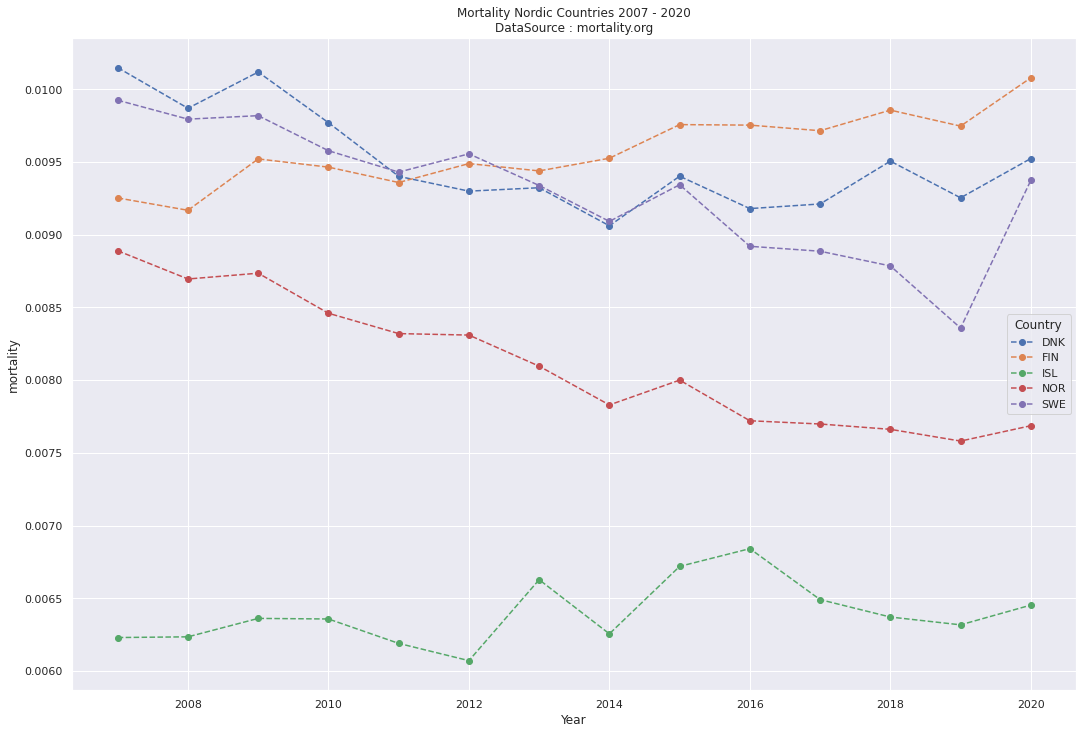

In [262]:
title = 'Mortality Nordic Countries 2007 - 2020\nDataSource : mortality.org'
nordic_mortality.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('mortality')
plt.savefig('mortality_org_nordics_2007_2020.jpg',format='jpg')

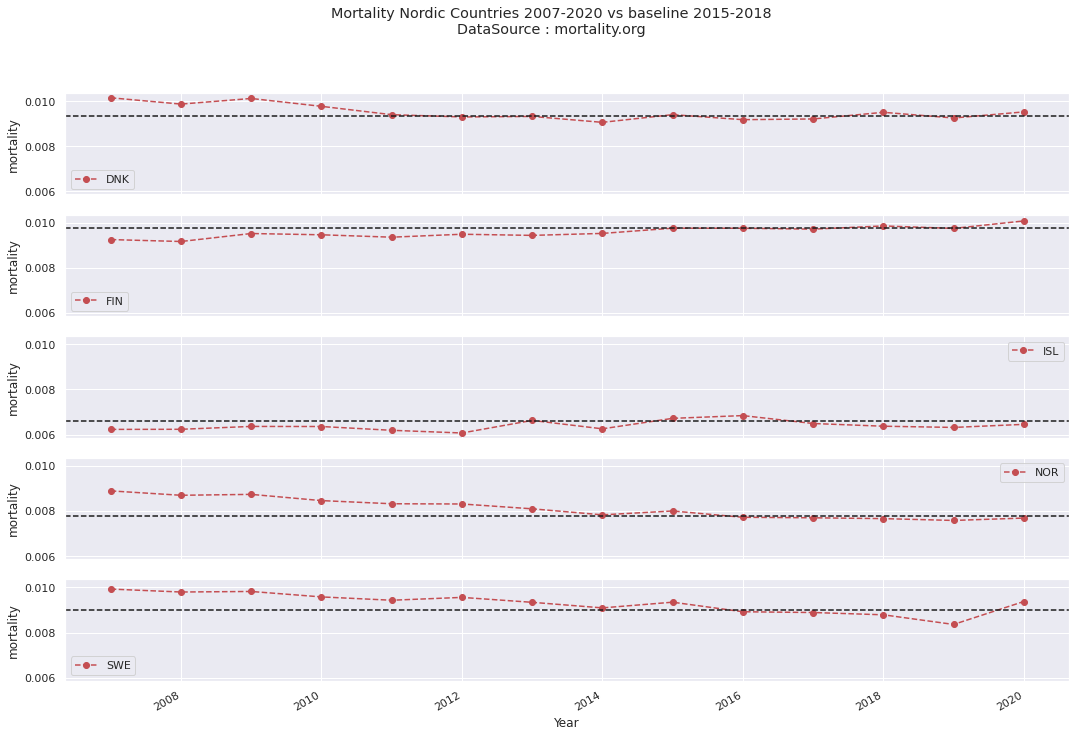

In [263]:
title = 'Mortality Nordic Countries 2007-2020 vs baseline 2015-2018\nDataSource : mortality.org'
axes = nordic_mortality.plot(figsize=(18,12),style='ro--',title=title,subplots=True,sharey=True)

for i,a in enumerate(axes):
    a.axhline(nordic_mortality_baseline.iloc[i],color='k',ls='dashed')
    a.set_ylabel('mortality')
    
plt.savefig('mortality_org_nordics_trend_vs_baseline.jpg',format='jpg')

In [264]:
growth_vs_baseline = nordic_mortality / nordic_mortality_baseline
growth_vs_baseline

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2007,1.088385,0.947007,0.943133,1.144074,1.104739
2008,1.058413,0.938307,0.943878,1.119089,1.090236
2009,1.085124,0.974460,0.963057,1.124216,1.092913
2010,1.047785,0.968686,0.962458,1.088768,1.066086
2011,1.008218,0.957864,0.937054,1.070760,1.049696
2012,0.997296,0.971182,0.919077,1.069458,1.063690
2013,0.999812,0.966025,1.003356,1.041922,1.039454
2014,0.971748,0.974948,0.946987,1.007612,1.011982
2015,1.008303,0.998619,1.017215,1.029596,1.040043


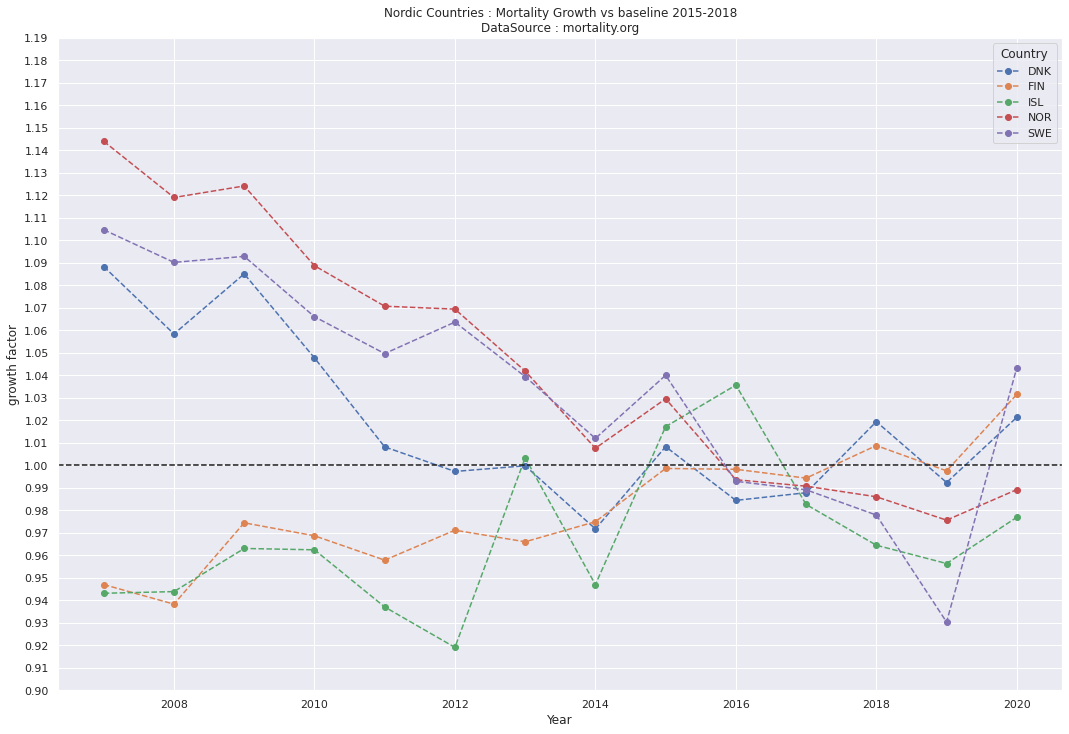

In [265]:
title='Nordic Countries : Mortality Growth vs baseline 2015-2018\nDataSource : mortality.org'
growth_vs_baseline.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('growth factor')
plt.yticks(np.arange(0.9,1.2,0.01))
plt.axhline(1,ls='dashed',color='k')
plt.savefig('mortality_org_nordics_growth.jpg',format='jpg')

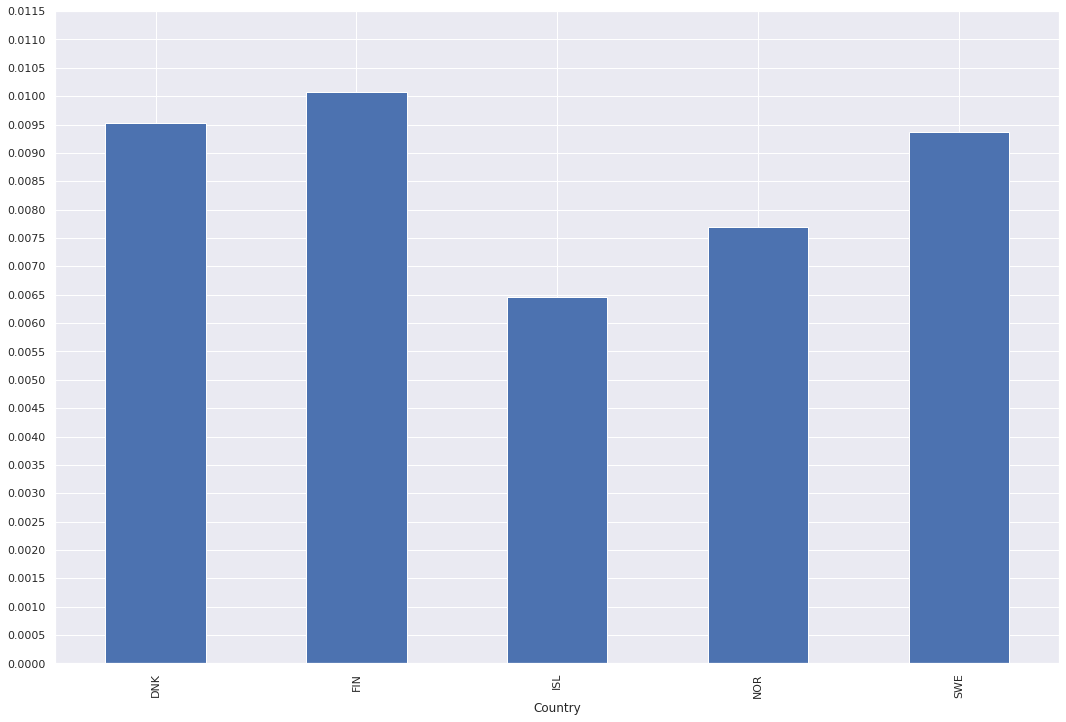

In [266]:
nordic_mortality.loc[2020].plot(kind='bar',figsize=(18,12))
_= plt.yticks(np.arange(0,0.012,0.0005))

In [267]:
nordic_mortality

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2007,0.010149,0.009253,0.006230,0.008890,0.009925
2008,0.009870,0.009168,0.006235,0.008696,0.009795
2009,0.010119,0.009522,0.006362,0.008736,0.009819
2010,0.009771,0.009465,0.006358,0.008460,0.009578
2011,0.009402,0.009359,0.006190,0.008320,0.009431
2012,0.009300,0.009490,0.006071,0.008310,0.009557
2013,0.009323,0.009439,0.006628,0.008096,0.009339
2014,0.009062,0.009526,0.006256,0.007830,0.009092
2015,0.009403,0.009758,0.006719,0.008000,0.009344


In [268]:
df_all

Sex  0-14  15-64  65-74  75-84  85+  Total    0-14.1  \
Country Year Week                                                        
SWE     2000 1      b    12    237    357    792  966   2364  0.000382   
             2      b     9    222    308    783  910   2232  0.000286   
             3      b    11    232    289    724  837   2093  0.000350   
             4      b     7    230    295    724  831   2087  0.000223   
             5      b     6    248    316    703  743   2016  0.000191   
...                ..   ...    ...    ...    ...  ...    ...       ...   
ISL     2020 49     b     0      0      7     13   19     39  0.000000   
             50     b     0      7      9      6   24     46  0.000000   
             51     b     0      4      7     13   19     43  0.000000   
             52     b     0      5     12     17   18     52  0.000000   
             53     b     0      4      5      9   12     30  0.000000   

                    15-64.1   65-74.1   75-84.1     85+.1   Total.1  Split  \
Country Year Week                                                            
SWE     2000 1     0.002160  0.024961  0.070486  0.247089  0.013855      0   
             2     0.002023  0.021535  0.069685  0.232765  0.013082      0   
             3     0.002114  0.020206  0.064434  0.214093  0.012267      0   
             4     0.002096  0.020626  0.064434  0.212558  0.012232      0   
             5     0.002260  0.022094  0.062565  0.190049  0.011816      0   
...                     ...       ...       ...       ...       ...    ...   
ISL     2020 49    0.000000  0.011688  0.042939  0.151919  0.005639      0   
             50    0.001523  0.015027  0.019818  0.191898  0.006651      0   
             51    0.000870  0.011688  0.042939  0.151919  0.006217      0   
             52    0.001088  0.020036  0.056151  0.143923  0.007518      0   
             53    0.000870  0.008348  0.029727  0.095949  0.004337      0   

                   SplitSex  Forecast  
Country Year Week                      
SWE     2000 1            0         0  
             2            0         0  
             3            0         0  
             4            0         0  
             5            0         0  
...                     ...       ...  
ISL     2020 49           0         1  
             50           0         1  
             51           0         1  
             52           0         1  
             53           0         1  

[5665 rows x 16 columns]

In [269]:
### PATTERN ###
### group the 2 sets of age group cols, one with deaths, one with mortality, to combined age groups ###
def combine_ages(col):
    if '0-14' in col:
        return '0-14'
    
    if '15-64' in col:
        return '15-64'
    
    if '65-74' in col:
        return '65-74'
    
    if '75-84' in col:
        return '75-84'
    
    if '85+' in col:
        return '85+'
    
g = df_all.groupby(combine_ages,axis=1)
print (g.groups)
###

### PATTERN ###
### div. grp deaths by grp mort and mult by nr of weeks in year ###

def calc_pop(grp):
    return (grp[grp.columns[0]] / grp[grp.columns[1]] * 52)
    
age_pop = g.apply(calc_pop)
###

age_pop = age_pop.dropna().astype(int)
age_pop

{'0-14': ['0-14', '0-14.1'], '15-64': ['15-64', '15-64.1'], '65-74': ['65-74', '65-74.1'], '75-84': ['75-84', '75-84.1'], '85+': ['85+', '85+.1']}


0-14    15-64   65-74   75-84     85+
Country Year Week                                          
SWE     2000 1     1634268  5706772  743726  584288  203294
             2     1634268  5706772  743726  584288  203294
             3     1634268  5706772  743726  584288  203294
             4     1634268  5706772  743726  584288  203294
             5     1634268  5706772  743726  584288  203294
...                    ...      ...     ...     ...     ...
ISL     2020 37      67267   239007   31143   15743    6503
             39      67267   239007   31143   15743    6503
             41      67267   239007   31143   15743    6503
             43      67267   239007   31143   15743    6503
             48      67267   239007   31143   15743    6503

[4819 rows x 5 columns]

In [270]:
age_grp_pop = age_pop.groupby(['Country','Year']).mean()
age_grp_pop


0-14      15-64      65-74     75-84       85+
Country Year                                                     
DNK     2007  1011603.0  3605695.0   461529.0  275664.0  106708.0
        2008  1008501.0  3620783.0   480678.0  275736.0  107960.0
        2009  1004906.0  3628597.0   503529.0  276540.0  109296.0
        2010   997926.0  3630909.0   529278.0  278770.0  110859.0
        2011   990975.0  3627330.0   557664.0  282333.0  112408.0
...                 ...        ...        ...       ...       ...
SWE     2017  1778221.0  6289865.0  1115863.0  615836.0  260409.0
        2018  1807525.0  6347638.0  1115845.0  645561.0  260547.0
        2019  1827402.0  6401628.0  1107832.0  682175.0  262220.0
        2020  1835386.0  6425886.0  1094547.0  721413.0  264942.0
        2021  1835022.0  6423879.0  1083535.0  759742.0  269376.0

[112 rows x 5 columns]

In [271]:
age_dead_grps = df_all.groupby(combine_ages,axis=1)

def calc_dead(grp):
    return (grp[grp.columns[0]].groupby(['Country','Year']).sum())

age_grp_dead = age_dead_grps.apply(calc_dead)
age_grp_dead

0-14  15-64  65-74  75-84    85+
Country Year                                  
DNK     2007   374  11150   9874  16420  17610
        2008   369  10629   9977  15786  17461
        2009   297  10731  10225  16381  18252
        2010   294  10125  10273  15650  17864
        2011   308   9371  10148  15034  17514
...            ...    ...    ...    ...    ...
SWE     2017   416   9427  14635  24582  40343
        2018   394   9266  14858  25140  39756
        2019   362   8752  13915  24917  37990
        2020   413   9221  14776  29383  43157
        2021    42   1198   2095   4200   6474

[112 rows x 5 columns]

In [272]:
age_grp_mort = age_grp_dead / age_grp_pop
age_grp_mort

0-14     15-64     65-74     75-84       85+
Country Year                                                  
DNK     2007  0.000370  0.003092  0.021394  0.059565  0.165030
        2008  0.000366  0.002936  0.020756  0.057250  0.161736
        2009  0.000296  0.002957  0.020307  0.059236  0.166996
        2010  0.000295  0.002789  0.019409  0.056139  0.161142
        2011  0.000311  0.002583  0.018197  0.053249  0.155807
...                ...       ...       ...       ...       ...
SWE     2017  0.000234  0.001499  0.013115  0.039916  0.154922
        2018  0.000218  0.001460  0.013315  0.038943  0.152587
        2019  0.000198  0.001367  0.012561  0.036526  0.144878
        2020  0.000225  0.001435  0.013500  0.040730  0.162892
        2021  0.000023  0.000186  0.001933  0.005528  0.024033

[112 rows x 5 columns]

In [273]:
std_pop = age_grp_pop.loc['SWE'].loc[2019]
std_pop

0-14     1827402.0
15-64    6401628.0
65-74    1107832.0
75-84     682175.0
85+       262220.0
Name: 2019, dtype: float64

In [274]:
std_age_grp_dead = std_pop * age_grp_mort
std_age_grp_dead

0-14         15-64         65-74         75-84  \
Country Year                                                         
DNK     2007  675.609254  19795.948409  23701.074403  40633.936604   
        2008  668.627337  18792.317577  22994.270310  39054.800788   
        2009  540.088719  18931.799279  22496.384915  40409.013795   
        2010  538.372773  17851.310374  21502.420535  38296.942820   
        2011  567.965707  16538.240521  20159.592758  36325.257586   
...                  ...           ...           ...           ...   
SWE     2017  427.505486   9594.505948  14529.670148  27230.018787   
        2018  398.332741   9344.812204  14751.303143  26565.854350   
        2019  362.000000   8752.000000  13915.000000  24917.000000   
        2020  411.203434   9186.190323  14955.342833  27784.844500   
        2021   41.825593   1193.850374   2141.977915   3771.194695   

                       85+  
Country Year                
DNK     2007  43274.114406  
        2008  42410.368840  
        2009  43789.703557  
        2010  42254.558313  
        2011  40855.820582  
...                    ...  
SWE     2017  40623.563164  
        2018  40011.277505  
        2019  37990.000000  
        2020  42713.607280  
        2021   6302.017552  

[112 rows x 5 columns]

In [275]:
std_dead = std_age_grp_dead.sum(axis=1)
std_dead

Country  Year
DNK      2007    128080.683076
         2008    123920.384851
         2009    126166.990266
         2010    120443.604816
         2011    114446.877154
                     ...      
SWE      2017     92405.263533
         2018     91071.579943
         2019     85936.000000
         2020     95051.188370
         2021     13450.866129
Length: 112, dtype: float64

In [276]:
# drop all NAN years #

std_dead = std_dead.loc[std_dead.index.get_level_values(1) >= 2007]
std_dead

Country  Year
DNK      2007    128080.683076
         2008    123920.384851
         2009    126166.990266
         2010    120443.604816
         2011    114446.877154
                     ...      
SWE      2017     92405.263533
         2018     91071.579943
         2019     85936.000000
         2020     95051.188370
         2021     13450.866129
Length: 74, dtype: float64

In [277]:
std_dead = std_dead.unstack().T

In [278]:
std_dead.drop(2021,axis=0,inplace=True)
std_dead

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2007,128080.683076,112499.155445,100306.720117,109080.577957,106300.702764
2008,123920.384851,109625.618285,100765.559494,106622.041969,104522.242513
2009,126166.990266,111967.228581,100506.296233,106891.168966,104417.849620
2010,120443.604816,109411.943558,98838.982304,103544.933466,101405.709131
2011,114446.877154,105848.275674,94345.885778,101654.195581,99328.259034
2012,111555.495315,105279.762586,90156.810940,101749.884086,100291.363568
2013,110511.415670,102447.270898,97444.667805,99103.884759,97810.275270
2014,105732.695643,101053.548700,90194.303640,95601.296598,94801.698502
2015,108735.907237,101374.694441,95944.316878,97380.052316,97195.640265


<AxesSubplot:xlabel='Year'>

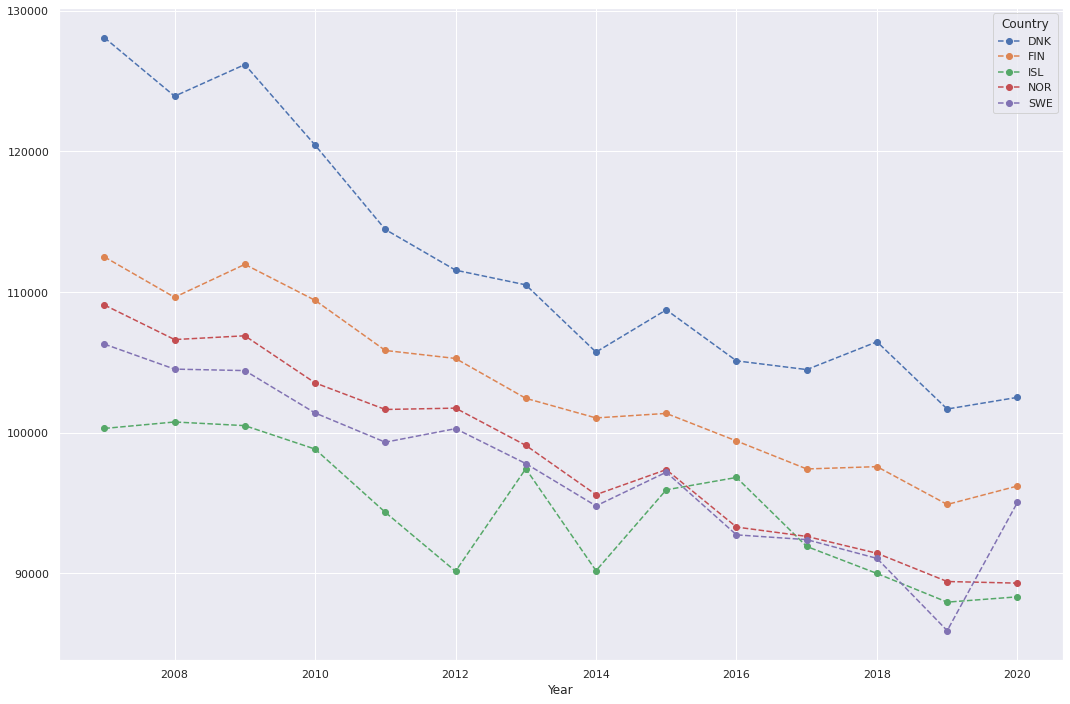

In [279]:
std_dead.plot(figsize=(18,12),style='o--')

In [280]:
age_adj_mort = std_dead / std_pop.sum()
age_adj_mort

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2007,0.012458,0.010942,0.009756,0.010610,0.010339
2008,0.012053,0.010663,0.009801,0.010371,0.010166
2009,0.012272,0.010890,0.009776,0.010397,0.010156
2010,0.011715,0.010642,0.009614,0.010071,0.009863
2011,0.011132,0.010295,0.009176,0.009887,0.009661
2012,0.010850,0.010240,0.008769,0.009897,0.009755
2013,0.010749,0.009964,0.009478,0.009639,0.009513
2014,0.010284,0.009829,0.008773,0.009299,0.009221
2015,0.010576,0.009860,0.009332,0.009472,0.009454


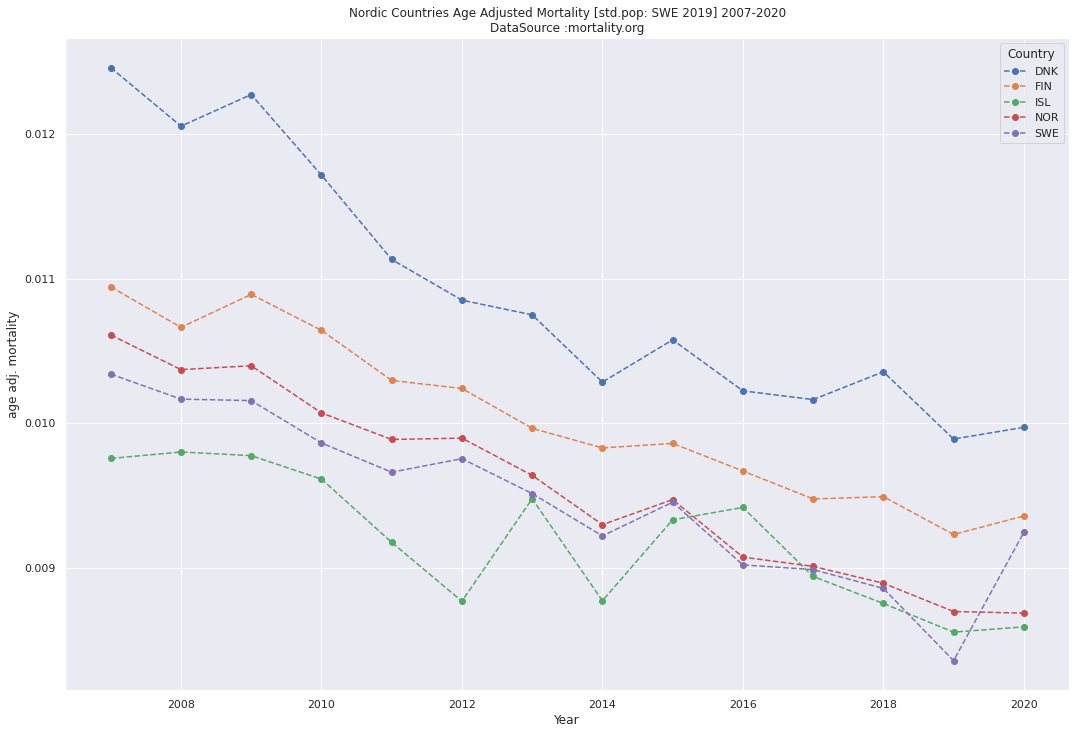

In [281]:
title = 'Nordic Countries Age Adjusted Mortality [std.pop: SWE 2019] 2007-2020\nDataSource :mortality.org'
age_adj_mort.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('age adj. mortality')
plt.savefig('mortality_org_nordics_age_adj_mort_2007_2020.jpg',format='jpg')

In [282]:
age_adj_mort_baseline = age_adj_mort.loc[2015:2018].mean()
age_adj_mort_baseline

Country
DNK    0.010329
FIN    0.009625
ISL    0.009111
NOR    0.009112
SWE    0.009080
dtype: float64

In [283]:
age_adj_mort_growth = age_adj_mort / age_adj_mort_baseline
age_adj_mort_growth

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2007,1.206032,1.136900,1.070837,1.164312,1.138687
2008,1.166858,1.107860,1.075736,1.138070,1.119636
2009,1.188012,1.131524,1.072968,1.140943,1.118518
2010,1.134120,1.105701,1.055168,1.105226,1.086252
2011,1.077653,1.069687,1.007202,1.085044,1.063998
2012,1.050427,1.063942,0.962481,1.086066,1.074315
2013,1.040596,1.035317,1.040283,1.057822,1.047738
2014,0.995599,1.021232,0.962881,1.020436,1.015510
2015,1.023878,1.024478,1.024266,1.039422,1.041154


<AxesSubplot:xlabel='Year'>

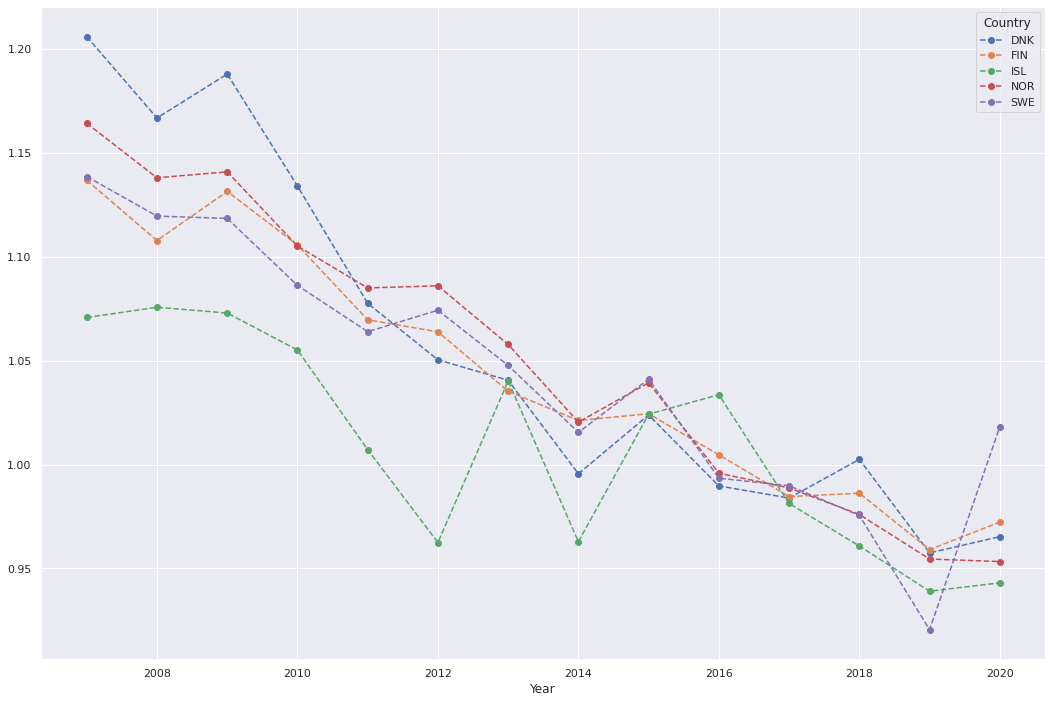

In [284]:
age_adj_mort_growth.plot(figsize=(18,12),style='o--')

In [285]:
x = 10000 * 200000
print ('{:.2E}'.format(x))

2.00E+09


In [286]:
age_grp_dead = age_grp_dead.loc[(age_grp_dead.index.get_level_values(1) >= 2007) &\
                                (age_grp_dead.index.get_level_values(1) <= 2020)]
age_grp_dead.loc['SWE']

,0-14,15-64,65-74,75-84,85+
Year,,,,,
2007,421,12114,12457,27646,38172
2008,416,12142,12618,26663,38485
2009,471,12030,13239,26318,39255
2010,437,11495,13376,25632,38903
2011,382,11068,13635,24930,39112
2012,437,10731,14106,25155,40556
2013,432,10697,14443,24619,39483
2014,379,10402,14605,23998,38794
2015,441,10334,15180,24932,40693


In [287]:
age_grp_dead

0-14  15-64  65-74  75-84    85+
Country Year                                  
DNK     2007   374  11150   9874  16420  17610
        2008   369  10629   9977  15786  17461
        2009   297  10731  10225  16381  18252
        2010   294  10125  10273  15650  17864
        2011   308   9371  10148  15034  17514
...            ...    ...    ...    ...    ...
SWE     2016   442   9631  14839  24118  39518
        2017   416   9427  14635  24582  40343
        2018   394   9266  14858  25140  39756
        2019   362   8752  13915  24917  37990
        2020   413   9221  14776  29383  43157

[70 rows x 5 columns]

In [288]:
### PATTERN ###
avg_dead_pairwise_years = age_grp_dead.groupby('Country').apply(lambda x : (x + x.shift())/2).dropna()
avg_dead_pairwise_years

0-14    15-64    65-74    75-84      85+
Country Year                                           
DNK     2008  371.5  10889.5   9925.5  16103.0  17535.5
        2009  333.0  10680.0  10101.0  16083.5  17856.5
        2010  295.5  10428.0  10249.0  16015.5  18058.0
        2011  301.0   9748.0  10210.5  15342.0  17689.0
        2012  294.0   9150.0  10277.5  15063.0  17403.5
...             ...      ...      ...      ...      ...
SWE     2016  441.5   9982.5  15009.5  24525.0  40105.5
        2017  429.0   9529.0  14737.0  24350.0  39930.5
        2018  405.0   9346.5  14746.5  24861.0  40049.5
        2019  378.0   9009.0  14386.5  25028.5  38873.0
        2020  387.5   8986.5  14345.5  27150.0  40573.5

[65 rows x 5 columns]

In [289]:
pairwise_age_grp_mort = (avg_dead_pairwise_years / age_grp_pop).dropna()
pairwise_age_grp_mort 

0-14     15-64     65-74     75-84       85+
Country Year                                                  
DNK     2008  0.000368  0.003007  0.020649  0.058400  0.162426
        2009  0.000331  0.002943  0.020060  0.058160  0.163377
        2010  0.000296  0.002872  0.019364  0.057451  0.162892
        2011  0.000304  0.002687  0.018309  0.054340  0.157364
        2012  0.000300  0.002524  0.017613  0.052313  0.152562
...                ...       ...       ...       ...       ...
SWE     2016  0.000254  0.001604  0.013534  0.041222  0.154402
        2017  0.000241  0.001515  0.013207  0.039540  0.153338
        2018  0.000224  0.001472  0.013216  0.038511  0.153713
        2019  0.000207  0.001407  0.012986  0.036689  0.148246
        2020  0.000211  0.001398  0.013106  0.037634  0.153141

[65 rows x 5 columns]

In [290]:
pairwise_std_dead = pairwise_age_grp_mort * std_pop
pairwise_std_mort = pairwise_std_dead.sum(axis=1) / std_pop.sum()
pairwise_std_mort = pairwise_std_mort.unstack().T
pairwise_std_mort

Country,DNK,FIN,ISL,NOR,SWE
Year,,,,,
2008,0.012181,0.010680,0.009653,0.010425,0.010197
2009,0.012079,0.010649,0.009676,0.010319,0.010101
2010,0.011894,0.010639,0.009606,0.010168,0.009944
2011,0.011319,0.010318,0.009284,0.009912,0.009703
2012,0.010885,0.010136,0.008846,0.009833,0.009657
2013,0.010705,0.009965,0.009015,0.009710,0.009584
2014,0.010414,0.009759,0.009011,0.009402,0.009301
2015,0.010339,0.009728,0.008949,0.009321,0.009278
2016,0.010307,0.009659,0.009265,0.009206,0.009175


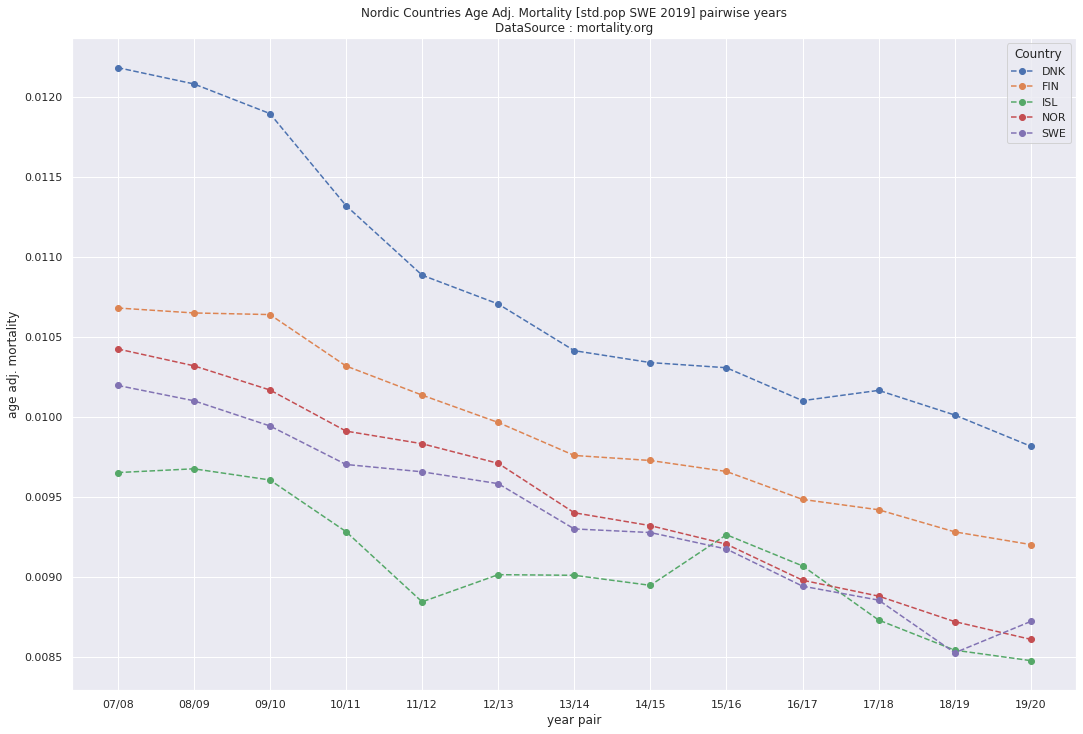

In [291]:
### 07/08...19/20 ###
xticks = ['07/08','08/09','09/10','10/11','11/12','12/13',
         '13/14','14/15','15/16','16/17','17/18','18/19','19/20']

title = 'Nordic Countries Age Adj. Mortality [std.pop SWE 2019] pairwise years\nDataSource : mortality.org'
ax = pairwise_std_mort.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('age adj. mortality')
plt.xlabel('year pair')

_= ax.set_xticks(pairwise_std_mort.index)
_= ax.set_xticklabels(xticks)